**CMPT 2400 – Final Project: Environmental Waste Analysis**

**Group Members:** Tanish,Mankaran,Akshit

**Problem Statement:**


*   **Predict the releases from the fossil fuel electricity generation sector if coal power plants are entirely phased out
by 2030.**








# **Data Project 2: Consolidating Data & Feature Engineering**

# **Checking both datasets**

In [1]:
# importing main libraries
# Data manipulation
import pandas as pd
import numpy as np

# Visualization (optional but helpful)
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Feature Engineering
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler



In [2]:
# loading the datasets for merging
df_release = pd.read_csv('release_dataset.csv')
df_disposals = pd.read_csv('disposals_dataset.csv')

In [3]:
df_release.head()

,Reporting_Year,NPRI_ID,Number of employees,Company_Name,Facility_Name,NAICS,NAICS Title,PROVINCE,City,Latitude,...,Release to Air - Spills,Release to Air - Stack,Release to Air - Storage,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
0,2000,7114.0,440.0,Alberta-Pacific Forest Industries Inc.,alberta-pacific forest industries inc.,322112.0,Chemical pulp mills,AB,County of Athabasca,54.923116,...,0.0003,5.200000,0.358,0.0,5.0,0.002,2.068,0.0,0.0879,0.0237
1,2000,7114.0,440.0,Alberta-Pacific Forest Industries Inc.,alberta-pacific forest industries inc.,322112.0,Chemical pulp mills,AB,County of Athabasca,54.923116,...,0.0003,113.000000,0.358,0.0,5.0,0.002,2.068,0.0,0.0879,0.0237
2,2000,7114.0,440.0,Alberta-Pacific Forest Industries Inc.,alberta-pacific forest industries inc.,322112.0,Chemical pulp mills,AB,County of Athabasca,54.923116,...,0.0003,4.037595,0.358,0.0,5.0,0.002,2.068,0.0,0.0879,0.0237
3,2000,7114.0,440.0,Alberta-Pacific Forest Industries Inc.,alberta-pacific forest industries inc.,322112.0,Chemical pulp mills,AB,County of Athabasca,54.923116,...,0.0003,7.670000,0.358,0.0,5.0,0.002,2.068,0.0,0.0879,0.0237
4,2000,7114.0,440.0,Alberta-Pacific Forest Industries Inc.,alberta-pacific forest industries inc.,322112.0,Chemical pulp mills,AB,County of Athabasca,54.923116,...,0.0003,0.665000,0.358,0.0,5.0,0.002,2.068,0.0,0.0879,0.0237


In [4]:
df_release.shape

(737516, 28)

In [5]:
df_release.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 28 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Reporting_Year                                737516 non-null  int64  
 1   NPRI_ID                                       737516 non-null  float64
 2   Number of employees                           737516 non-null  float64
 3   Company_Name                                  737516 non-null  object 
 4   Facility_Name                                 736127 non-null  object 
 5   NAICS                                         737516 non-null  float64
 6   NAICS Title                                   737516 non-null  object 
 7   PROVINCE                                      737516 non-null  object 
 8   City                                          737516 non-null  object 
 9   Latitude                                      73

In [6]:
df_release['Facility_Name'] = df_release['Facility_Name'].fillna("UNKNOWN FACILITY")

In [7]:
df_disposals.shape

(191645, 28)

In [8]:
df_disposals.head()

,Reporting_Year,NPRI_ID,Number of employees,Company_Name,Facility_Name,NAICS,NAICS Title,PROVINCE,City,Latitude,...,Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment,Off-site Transfers for Treatment Prior to Final Disposal - Incineration,Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant,Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment,Off-site Transfers for Recycling - Energy Recovery,Off-site Transfers for Recycling - Other,Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds,Off-site Transfers for Recycling - Recovery of Solvents,Off-site Transfers for Recycling - Refining or Re-use of Used Oil,Total On-site Disposal
0,2000,4540.0,440.0,Alberta-Pacific Forest Industries Inc.,alberta-pacific forest industries inc.,322112.0,Chemical pulp mills,AB,County of Athabasca,54.923116,...,0.688,0.482,0.117,0.90735,1.766,2.704,15.6835,3.335295,0.314,9.2255
1,2000,4540.0,440.0,Alberta-Pacific Forest Industries Inc.,alberta-pacific forest industries inc.,322112.0,Chemical pulp mills,AB,County of Athabasca,54.923116,...,0.688,0.482,0.117,0.90735,1.766,2.704,15.6835,3.335295,0.314,9.2255
2,2000,4540.0,500.0,Pine Falls Paper Company,pine falls,322122.0,Newsprint mills,MB,PINE FALLS,50.568600,...,0.688,0.482,0.117,0.90735,1.766,2.704,15.6835,3.335295,0.314,3.9650
3,2000,4540.0,500.0,Pine Falls Paper Company,pine falls,322122.0,Newsprint mills,MB,PINE FALLS,50.568600,...,0.688,0.482,0.117,0.90735,1.766,2.704,15.6835,3.335295,0.314,7.0250
4,2000,4540.0,500.0,Pine Falls Paper Company,pine falls,322122.0,Newsprint mills,MB,PINE FALLS,50.568600,...,0.688,0.482,0.117,0.90735,1.766,2.704,15.6835,3.335295,0.314,9.2255


In [9]:
df_disposals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191645 entries, 0 to 191644
Data columns (total 28 columns):
 #   Column                                                                                       Non-Null Count   Dtype  
---  ------                                                                                       --------------   -----  
 0   Reporting_Year                                                                               191645 non-null  int64  
 1   NPRI_ID                                                                                      191645 non-null  float64
 2   Number of employees                                                                          191645 non-null  float64
 3   Company_Name                                                                                 191645 non-null  object 
 4   Facility_Name                                                                                190898 non-null  object 
 5   NAICS                  

In [10]:
df_disposals['Facility_Name'] = df_disposals['Facility_Name'].fillna("UNKNOWN FACILITY")
df_disposals.isnull().sum()

,0
Reporting_Year,0
NPRI_ID,0
Number of employees,0
Company_Name,0
Facility_Name,0
NAICS,0
NAICS Title,0
PROVINCE,0
City,0
Latitude,0


In [11]:
df_release.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 28 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Reporting_Year                                737516 non-null  int64  
 1   NPRI_ID                                       737516 non-null  float64
 2   Number of employees                           737516 non-null  float64
 3   Company_Name                                  737516 non-null  object 
 4   Facility_Name                                 737516 non-null  object 
 5   NAICS                                         737516 non-null  float64
 6   NAICS Title                                   737516 non-null  object 
 7   PROVINCE                                      737516 non-null  object 
 8   City                                          737516 non-null  object 
 9   Latitude                                      73

In [12]:
df_disposals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191645 entries, 0 to 191644
Data columns (total 28 columns):
 #   Column                                                                                       Non-Null Count   Dtype  
---  ------                                                                                       --------------   -----  
 0   Reporting_Year                                                                               191645 non-null  int64  
 1   NPRI_ID                                                                                      191645 non-null  float64
 2   Number of employees                                                                          191645 non-null  float64
 3   Company_Name                                                                                 191645 non-null  object 
 4   Facility_Name                                                                                191645 non-null  object 
 5   NAICS                  

# **Merging**

In [13]:
df_disposals['Reporting_Year'] = pd.to_numeric(df_disposals['Reporting_Year'], errors='coerce').astype('Int64')
df_release['Reporting_Year'] = pd.to_numeric(df_release['Reporting_Year'], errors='coerce').astype('Int64')
df_disposals = df_disposals.dropna(subset=['Reporting_Year'])
df_release = df_release.dropna(subset=['Reporting_Year'])


In [14]:
years = (df_disposals['Reporting_Year'] >= 1999) & (df_disposals['Reporting_Year'] <= 2023)
df_disposals = df_disposals[years]

years = (df_release['Reporting_Year'] >= 1999) & (df_release['Reporting_Year'] <= 2023)
df_release = df_release[years]


**This cell merges the release and disposal DataFrames on common columns using an outer join**

In [15]:
merged_df = df_disposals.merge(
    df_release,
    how='outer',
    on=['Reporting_Year', 'NPRI_ID', 'Company_Name', 'Facility_Name',
        'NAICS', 'NAICS Title', 'CAS_Number', 'Substance Name (English)', 'Units','PROVINCE','City','Latitude','Number of employees','Longitude','Estimation_Method']
)


**This cell shows the merged DataFrame**

In [16]:
merged_df

,Reporting_Year,NPRI_ID,Number of employees,Company_Name,Facility_Name,NAICS,NAICS Title,PROVINCE,City,Latitude,...,Release to Air - Spills,Release to Air - Stack,Release to Air - Storage,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,Sum of release to all media (<1tonne)
0,2000,105.0,18.0,Aldex Chemical Co. Ltd,Unknown Facility,339990.0,All other miscellaneous manufacturing,QC,Granby,45.391790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,105.0,18.0,Aldex Chemical Co. Ltd,Unknown Facility,339990.0,All other miscellaneous manufacturing,QC,Granby,45.391790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,105.0,18.0,Aldex Chemical Co. Ltd,Unknown Facility,339990.0,All other miscellaneous manufacturing,QC,Granby,45.391790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,106.0,25.0,Anderson Exploration Ltd.,dunvegan gas unit #1,211113.0,Conventional oil and gas extraction,AB,Fairview,55.998570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,106.0,25.0,Anderson Exploration Ltd.,dunvegan gas unit #1,211113.0,Conventional oil and gas extraction,AB,Fairview,55.998570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857648,2022,32581.0,1.0,Whitecap Resources Inc.,elrose 14-05-025-14w3 swb (101/04-05),211110.0,Oil and gas extraction (except oil sands),SK,0,51.109131,...,0.0003,0.301630,0.35800,0.0,5.0,0.002,2.068,0.0,0.0879,0.0237
857649,2022,32581.0,1.0,Whitecap Resources Inc.,elrose 14-05-025-14w3 swb (101/04-05),211110.0,Oil and gas extraction (except oil sands),SK,0,51.109131,...,0.0003,0.301630,0.35800,0.0,5.0,0.002,2.068,0.0,0.0879,0.0237
857650,2022,32581.0,1.0,Whitecap Resources Inc.,elrose 14-05-025-14w3 swb (101/04-05),211110.0,Oil and gas extraction (except oil sands),SK,0,51.109131,...,0.0003,0.301630,0.35800,0.0,5.0,0.002,2.068,0.0,0.0879,0.0237
857651,2022,32581.0,1.0,Whitecap Resources Inc.,elrose 14-05-025-14w3 swb (101/04-05),211110.0,Oil and gas extraction (except oil sands),SK,0,51.109131,...,0.0003,0.451100,0.35800,0.0,5.0,0.002,2.068,0.0,0.0879,0.0237


In [17]:
merged_df.shape

(857653, 41)

# **EDA on merged dataFrame**

In [18]:
#creating copy
df = merged_df.copy()

In [19]:
df.isnull().sum()

,0
Reporting_Year,0
NPRI_ID,0
Number of employees,0
Company_Name,0
Facility_Name,0
NAICS,0
NAICS Title,0
PROVINCE,0
City,0
Latitude,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857653 entries, 0 to 857652
Data columns (total 41 columns):
 #   Column                                                                                       Non-Null Count   Dtype  
---  ------                                                                                       --------------   -----  
 0   Reporting_Year                                                                               857653 non-null  Int64  
 1   NPRI_ID                                                                                      857653 non-null  float64
 2   Number of employees                                                                          857653 non-null  float64
 3   Company_Name                                                                                 857653 non-null  object 
 4   Facility_Name                                                                                857653 non-null  object 
 5   NAICS                  

In [21]:
# filling Null values with bfill and ffill
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)


<ipython-input-21-b7a5e4ec38e7>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-21-b7a5e4ec38e7>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [22]:
df.isnull().sum()

,0
Reporting_Year,0
NPRI_ID,0
Number of employees,0
Company_Name,0
Facility_Name,0
NAICS,0
NAICS Title,0
PROVINCE,0
City,0
Latitude,0


# **Feature Engineering**

In [23]:
# Rename for ease (optional)
df.rename(columns={"Sum of release to all media (<1tonne)": "total_release"}, inplace=True)

# Create binary indicator for fossil fuel sources (based on NAICS Title or Substance Name)
df['is_fossil_fuel'] = df['NAICS Title'].str.contains('electricity', case=False, na=False).astype(int)

# Flag if coal is involved
df['is_coal'] = df['Substance Name (English)'].str.contains('coal', case=False, na=False).astype(int)

# Total release from all media is your target
target = 'total_release'


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857653 entries, 0 to 857652
Data columns (total 43 columns):
 #   Column                                                                                       Non-Null Count   Dtype  
---  ------                                                                                       --------------   -----  
 0   Reporting_Year                                                                               857653 non-null  Int64  
 1   NPRI_ID                                                                                      857653 non-null  float64
 2   Number of employees                                                                          857653 non-null  float64
 3   Company_Name                                                                                 857653 non-null  object 
 4   Facility_Name                                                                                857653 non-null  object 
 5   NAICS                  

# **Visuals**

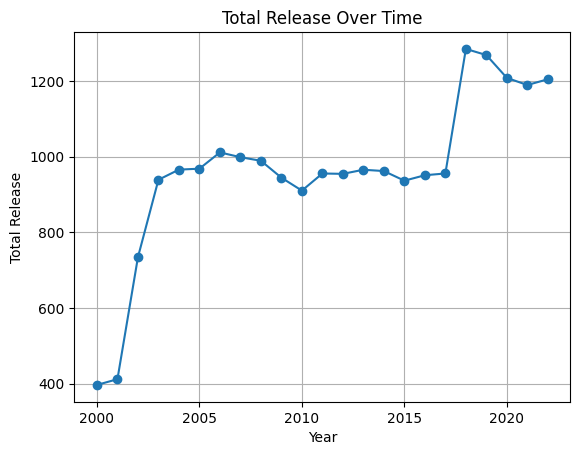

In [25]:
# Trend over the years
df.groupby('Reporting_Year')['total_release'].sum().plot(kind='line', marker='o')
plt.title("Total Release Over Time")
plt.xlabel("Year")
plt.ylabel("Total Release")
plt.grid(True)
plt.show()



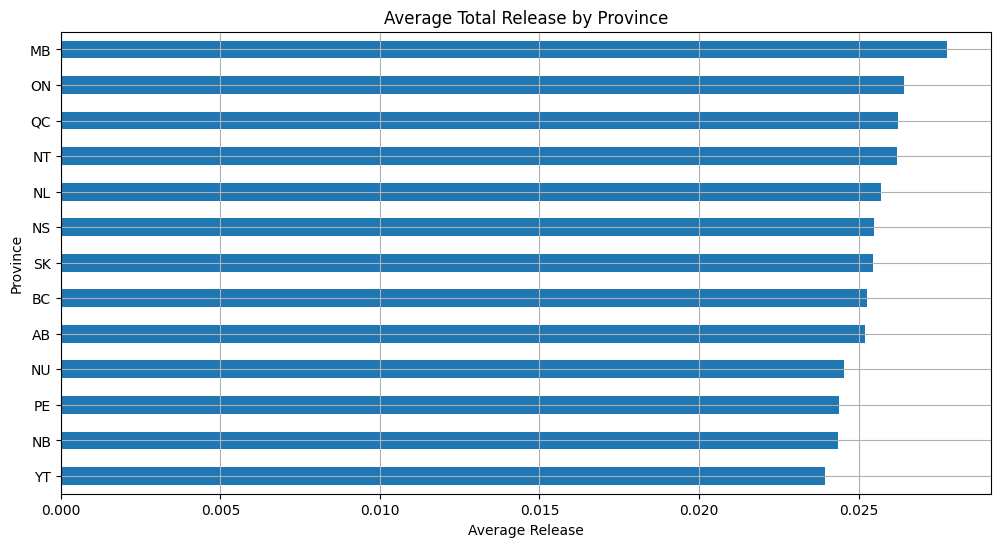

In [26]:
plt.figure(figsize=(12,6))
df.groupby('PROVINCE')['total_release'].mean().sort_values().plot(kind='barh')
plt.title("Average Total Release by Province")
plt.xlabel("Average Release")
plt.ylabel("Province")
plt.grid(True)
plt.show()


# **Feature selection**

In [27]:
# droping unnecessary columns
drop_cols = ['NPRI_ID', 'Company_Name', 'Facility_Name', 'Units',
             'Latitude', 'Longitude', 'CAS_Number', 'Estimation_Method']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)


In [28]:
# List of disposal and recycling columns to drop
disposal_columns = [
    'On-site Disposal - Landfill',
    'On-site Disposal - Land Treatment',
    'Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment',
    'Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment',
    'Off-site Transfers for Treatment Prior to Final Disposal - Incineration',
    'Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant',
    'Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment',
    'Off-site Transfers for Recycling - Energy Recovery',
    'Off-site Transfers for Recycling - Other',
    'Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds',
    'Off-site Transfers for Recycling - Recovery of Solvents',
    'Off-site Transfers for Recycling - Refining or Re-use of Used Oil',
    'Total On-site Disposal'
]

# Drop these columns safely
df.drop(columns=[col for col in disposal_columns if col in df.columns], inplace=True)


In [29]:
df.head()

,Reporting_Year,Number of employees,NAICS,NAICS Title,PROVINCE,City,Substance Name (English),Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,...,Release to Air - Storage,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,total_release,is_fossil_fuel,is_coal
0,2000,18.0,339990.0,All other miscellaneous manufacturing,QC,Granby,Styrene,0.796,0.49,3.5619,...,0.358,0.0,5.0,0.002,3.29,0.0,0.0879,0.0237,0,0
1,2000,18.0,339990.0,All other miscellaneous manufacturing,QC,Granby,Sulphuric acid,0.796,0.49,3.5619,...,0.358,0.0,5.0,0.002,3.29,0.0,0.0879,0.0237,0,0
2,2000,18.0,339990.0,All other miscellaneous manufacturing,QC,Granby,Ammonia (total),0.796,0.49,3.5619,...,0.358,0.0,5.0,0.002,3.29,0.0,0.0879,0.0237,0,0
3,2000,25.0,211113.0,Conventional oil and gas extraction,AB,Fairview,Toluene,0.796,0.49,3.5619,...,0.358,0.0,5.0,0.002,3.29,0.0,0.0879,0.0237,0,0
4,2000,25.0,211113.0,Conventional oil and gas extraction,AB,Fairview,n-Hexane,0.796,0.49,3.5619,...,0.358,0.0,5.0,0.002,3.29,0.0,0.0879,0.0237,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857653 entries, 0 to 857652
Data columns (total 22 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Reporting_Year                                857653 non-null  Int64  
 1   Number of employees                           857653 non-null  float64
 2   NAICS                                         857653 non-null  float64
 3   NAICS Title                                   857653 non-null  object 
 4   PROVINCE                                      857653 non-null  object 
 5   City                                          857653 non-null  object 
 6   Substance Name (English)                      857653 non-null  object 
 7   Release to Air - Fugitive                     857653 non-null  float64
 8   Release to Air - Other Non-Point              857653 non-null  float64
 9   Release to Air - Road dust                    85

# **Encoding**

In [31]:
from sklearn.preprocessing import LabelEncoder

# Drop high-cardinality irrelevant columns
high_card_cols = ['Company_Name', 'Facility_Name', 'City']
df.drop(columns=[col for col in high_card_cols if col in df.columns], inplace=True)

# Label Encode all meaningful categorical columns
label_cols = ['PROVINCE', 'NAICS Title', 'Substance Name (English)']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [32]:
df.head()

,Reporting_Year,Number of employees,NAICS,NAICS Title,PROVINCE,Substance Name (English),Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,...,Release to Air - Storage,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,total_release,is_fossil_fuel,is_coal
0,2000,18.0,339990.0,28,10,222,0.796,0.49,3.5619,0.0003,...,0.358,0.0,5.0,0.002,3.29,0.0,0.0879,0.0237,0,0
1,2000,18.0,339990.0,28,10,225,0.796,0.49,3.5619,0.0003,...,0.358,0.0,5.0,0.002,3.29,0.0,0.0879,0.0237,0,0
2,2000,18.0,339990.0,28,10,46,0.796,0.49,3.5619,0.0003,...,0.358,0.0,5.0,0.002,3.29,0.0,0.0879,0.0237,0,0
3,2000,25.0,211113.0,98,0,233,0.796,0.49,3.5619,0.0003,...,0.358,0.0,5.0,0.002,3.29,0.0,0.0879,0.0237,0,0
4,2000,25.0,211113.0,98,0,255,0.796,0.49,3.5619,0.0003,...,0.358,0.0,5.0,0.002,3.29,0.0,0.0879,0.0237,0,0


# **Scaling**

In [33]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['total_release']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [34]:
# scalimg done
df.head()

,Reporting_Year,Number of employees,NAICS,NAICS Title,PROVINCE,Substance Name (English),Release to Air - Fugitive,Release to Air - Other Non-Point,Release to Air - Road dust,Release to Air - Spills,...,Release to Air - Storage,Releases to Land - Leaks,Releases to Land - Other,Releases to Land - Spills,Releases to Water Bodies - Direct Discharges,Releases to Water Bodies - Leaks,Releases to Water Bodies - Spills,total_release,is_fossil_fuel,is_coal
0,-1.888171,-0.396433,0.581632,-1.489485,1.199718,0.790380,-0.154953,-0.058265,-0.048517,-7.589415e-19,...,-0.118342,0.0,0.0,-1.301043e-18,0.25975,0.0,-5.551115e-17,0.0237,0.0,0.0
1,-1.888171,-0.396433,0.581632,-1.489485,1.199718,0.838100,-0.154953,-0.058265,-0.048517,-7.589415e-19,...,-0.118342,0.0,0.0,-1.301043e-18,0.25975,0.0,-5.551115e-17,0.0237,0.0,0.0
2,-1.888171,-0.396433,0.581632,-1.489485,1.199718,-2.009195,-0.154953,-0.058265,-0.048517,-7.589415e-19,...,-0.118342,0.0,0.0,-1.301043e-18,0.25975,0.0,-5.551115e-17,0.0237,0.0,0.0
3,-1.888171,-0.383236,-0.947934,-0.956883,-1.119727,0.965354,-0.154953,-0.058265,-0.048517,-7.589415e-19,...,-0.118342,0.0,0.0,-1.301043e-18,0.25975,0.0,-5.551115e-17,0.0237,0.0,0.0
4,-1.888171,-0.383236,-0.947934,-0.956883,-1.119727,1.315301,-0.154953,-0.058265,-0.048517,-7.589415e-19,...,-0.118342,0.0,0.0,-1.301043e-18,0.25975,0.0,-5.551115e-17,0.0237,0.0,0.0
